I will develop a regression model using the Boston dataset. The goal of this netbook is to determine which variables influence the average home value in this city and attempt to predict future values.

In [3]:
!pip install ISLP

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import(ModelSpec as MS,
                 summarize,
                 poly)

First, I load the data we are going to work with and look at the different possible predictors and response variables.

In [5]:
Boston = load_data('Boston')

boston = pd.DataFrame(Boston)  #We are going to transform the df to be able to see the data more clearly.

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
boston.shape

(506, 13)

We have 506 rows, this is the number of observations in the dataset, and 13 columns

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


There appear to be no null values ​​and all variables are quantitative.

# Fit the model

We can start to train the model

In [9]:
allvar = boston.columns.drop('medv')

X = MS(allvar).fit_transform(boston)
y = boston['medv']

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


The coefficients indicate how the response (medv) is modified by a one-unit increase in the predictor.
A one-unit increase in crime reduces the median housing value by 0.1214 thousand dollars.

The standard error measures the precision with which the model estimates each coefficient. It is used to construct confidence intervals and to calculate the p-value in significance tests. The smaller the standard error, the more reliable the coefficient estimate.

The t-value is the statistic of a t-test that assesses whether the coefficient is significantly different from zero. It is calculated as the ratio of the estimated value of the coefficient to its standard error. The larger (in absolute value) t is, the greater the evidence against the null hypothesis that this predictor has no effect.

The p-vaule tells us the significance of the predictor in the response. We use it to reject the null hypothesis.



In [10]:
print(f'The Rsquared is: {results.rsquared}')
print(f'The RSE is: {results.scale}')

The Rsquared is: 0.7343070437613076
The RSE is: 23.021133485561673


The r-squared is high; the model explains the relationship between the variables well.

The RSE is also high, but slightly negative.

I will eliminate variables with high p-value

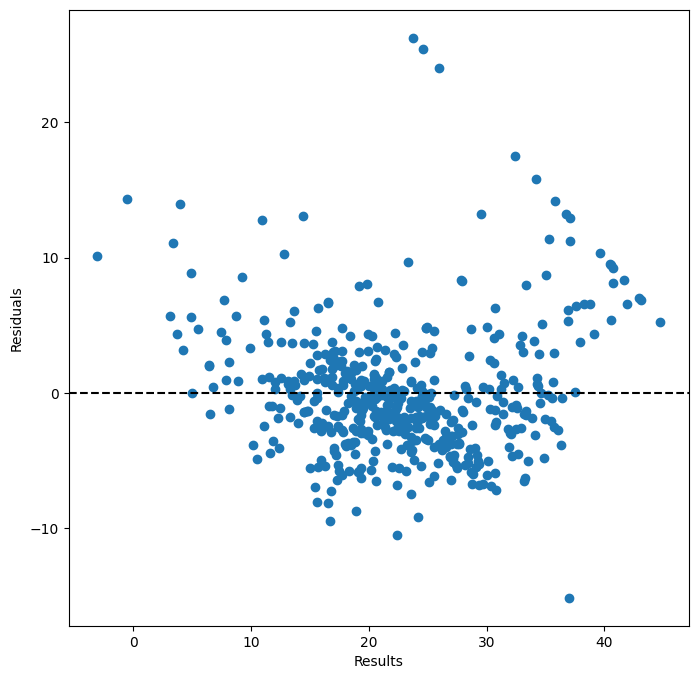

In [11]:
#Plot
ax = subplots(figsize= (8, 8))[1]

ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Results')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')
plt.show()

We can see some outliers, but the relationships seem very linear, it's hard to see a pattern.

In [12]:
newvars = boston.columns.drop(['medv', 'indus', 'age'])

X = MS(newvars).fit_transform(boston)
y = boston['medv']

model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,41.4517,4.903,8.454,0.000
crim,-0.1217,0.033,-3.696,0.000
zn,0.0462,0.014,3.378,0.001
chas,2.8719,0.863,3.329,0.001
nox,-18.2624,3.565,-5.122,0.000
rm,3.6730,0.409,8.978,0.000
dis,-1.5160,0.188,-8.078,0.000
rad,0.2839,0.064,4.440,0.000
tax,-0.0123,0.003,-3.608,0.000
ptratio,-0.9310,0.130,-7.138,0.000


In [13]:
print(f'The Rsquared is: {results.rsquared}')
print(f'The RSE is: {results.scale}')

print('-------------------------------------------------')

print(f'The Rsquared is: {results2.rsquared}')
print(f'The RSE is: {results2.scale}')

The Rsquared is: 0.7343070437613076
The RSE is: 23.021133485561673
-------------------------------------------------
The Rsquared is: 0.7342422518382486
The RSE is: 22.933710059207673


The model practically did not improve when removing the variables with low p-value

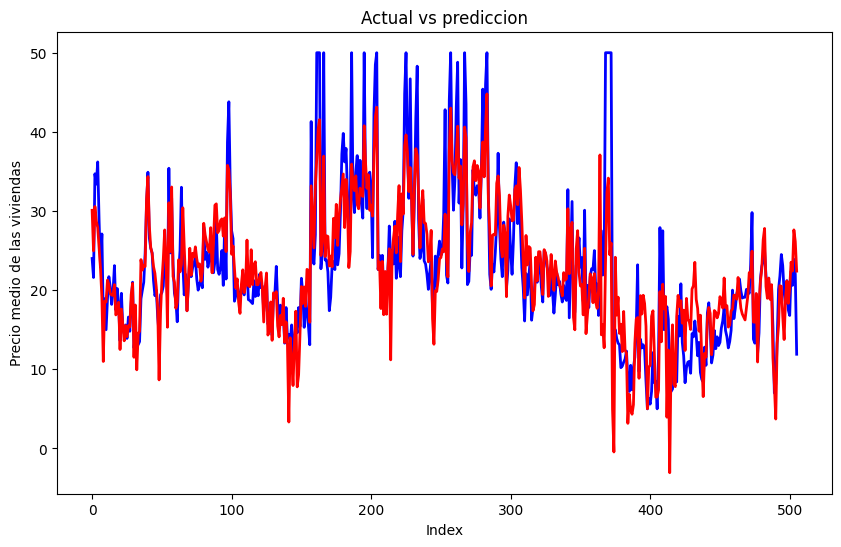

In [21]:
fig= plt.figure(figsize=(10,6))

plt.plot(y, color='blue',linewidth=2, linestyle='-') #Nuestro modelo actual.

plt.plot(results2.predict(), color='red', linewidth=2, linestyle='-') #Lo que predijo nuestro modelo

plt.title('Actual vs prediccion')
plt.xlabel('Index')
plt.ylabel('Precio medio de las viviendas')
plt.show()

The blue line shows what actually happened (it is the actual). While the red line is what our model predicted would happen. A perfect model would have to put both lines together.

The blue (actual) line shows real data, which may have variability, noise or abrupt changes, e.g. a marketing campaign with a lot of spending that did not generate sales.
Our model does not take that into account, it does NOT replicate abrupt changes.